<h1>Best Neighborhood by Arrest Reports</h1>
<p>I am looking at reported arrest to deterime the best neighborhood. The less arrests the better the neighborhood. 
For my data I used: <a href = "https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f"> This </a> </p>

In [16]:
import pandas as pd
import numpy as np
import pylab 
%matplotlib inline
arrests = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
arrests.head()  #origional file

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


I noticed that the graph of the number of arrest reports every year of all neighborhoods was kind of strange.

In [17]:
#condensing the datafram into parts I care about
relevantArrests= arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD" ]].copy()
relevantArrests

,ARRESTTIME,INCIDENTNEIGHBORHOOD
0,2016-08-24T12:20:00,Bloomfield
1,2016-08-03T14:55:00,Outside City
2,2016-08-03T16:45:00,Westwood
3,2016-08-05T02:36:00,East Allegheny
4,2016-08-06T02:00:00,Crafton Heights
...,...,...
47466,2021-03-26T21:42:00,East Liberty
47467,2021-03-26T22:29:00,South Oakland
47468,2021-03-26T23:51:00,Highland Park
47469,2021-03-26T19:19:00,Sheraden


<AxesSubplot:xlabel='Arrest Year'>

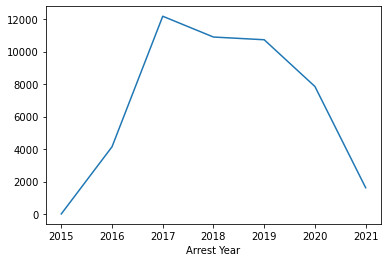

In [18]:
#Measure arrests over time for all neighborhoods combined
pd.to_datetime(relevantArrests["ARRESTTIME"]).dt.year
relevantArrests["Arrest Year"] = pd.to_datetime(relevantArrests["ARRESTTIME"]).dt.year
recent_relevant_arrests= relevantArrests[relevantArrests["Arrest Year"] >=2015 ]  #remove data before 2015 that was less reliable
recent_relevant_arrests.groupby("Arrest Year").size().plot()

<p> I don't need all that extra info so I got rid of the unnecessary parts. </p>

Then I counted the number of times an arrest was reported in each neighborhood. Then graphed it

In [19]:
#count number of arrests in each neighborhood
relevantArrests.groupby("INCIDENTNEIGHBORHOOD").count()

,ARRESTTIME,Arrest Year
INCIDENTNEIGHBORHOOD,,
Allegheny Center,865,865
Allegheny West,93,93
Allentown,692,692
Arlington,210,210
Arlington Heights,111,111
...,...,...
Upper Lawrenceville,151,151
West End,198,198
West Oakland,226,226


<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD'>

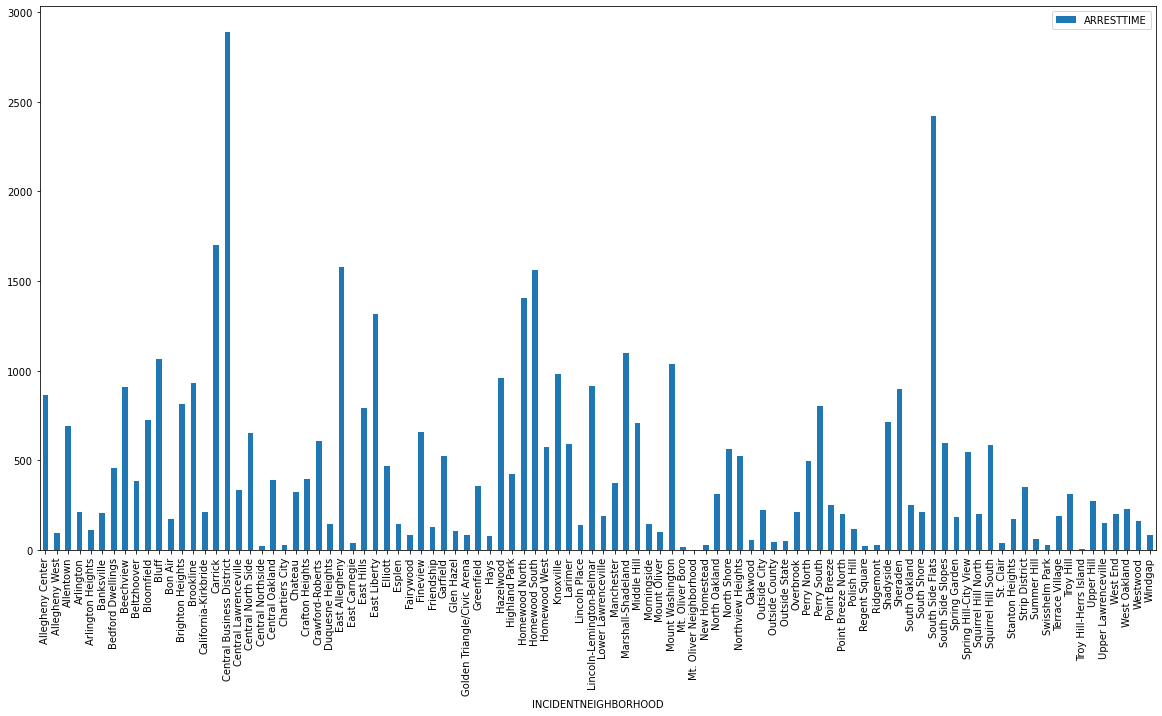

In [20]:
relevantArrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD" ]].groupby("INCIDENTNEIGHBORHOOD").count().plot.bar(figsize=(20,10))

In [23]:
#get the best Neighborhoods based on arrest reports
hood_count = arrests["INCIDENTNEIGHBORHOOD"].value_counts()
hood_count.tail(25)

Friendship                     128
Polish Hill                    116
Arlington Heights              111
Glen Hazel                     105
Mount Oliver                   100
Allegheny West                  93
Golden Triangle/Civic Arena     83
Windgap                         82
Fairywood                       81
Hays                            78
Summer Hill                     59
Oakwood                         57
Outside State                   49
Outside County                  42
East Carnegie                   38
St. Clair                       36
Swisshelm Park                  30
Chartiers City                  28
New Homestead                   27
Ridgemont                       26
Central Northside               23
Regent Square                   23
Mt. Oliver Boro                 17
Troy Hill-Herrs Island           6
Mt. Oliver Neighborhood          2
Name: INCIDENTNEIGHBORHOOD, dtype: int64

The neighborhood with the least arrests is <b>Mt. Oliver Neighborhood </b>followed by Troy Hill-Herrs Island.

In [22]:
#get the worst Neighborhoods based on arrest reports
hood_count = arrests["INCIDENTNEIGHBORHOOD"].value_counts()
hood_count.head()

Central Business District    2888
South Side Flats             2422
Carrick                      1700
East Allegheny               1580
Homewood South               1561
Name: INCIDENTNEIGHBORHOOD, dtype: int64

The neighborhood with the most arrests is The central Business District followed by the Sout Side Flats.

<h1> The Top 5 Neigborhoods with the least arrests</h1>
<ol>
    <li>Mt. Oliver Neighborhood</li>
    <li>Troy Hill-Herrs Island</li>
    <li>Mt. Oliver Boro</li>
    <li>Regent Square</li>
    <li>Central Northside</li>